<center><img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif"></center>

<h2><center>DSECLZG628T: Dissertation  </center></h2>

<h2><center>Stock gain forecasting for day opening using ML and NLP</center></h2>


**1. Collection of dataset**

  * News headlines data (Textual data) can be fetched using GitHub Code on my profile: [News Data](https://github.com/sarvsav/dissertation/tree/main/news_for_stocks_dissertation). The code fetches the economic times archive and filters the headlines into the python list, that further translated to csv format with date as first column, and news in dynamic columns.
  * Statsitical data is obtained using `nsetools`, and for this project, the data has been obtained from [Kaggle - NIFTY-50 Stock Market Data (2000 - 2021)](https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data/code)


**2.Exploratory data analysis**

2.a. Importing both the textual and statistical datasets.

In [ ]:
## Mounting the drive to read the excel files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing libraries
import pandas as pd
import datetime

## Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

import nltk
nltk.download('vader_lexicon')
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

## Auto tools
!pip3 install sweetviz
!pip3 install pandas_profiling --upgrade
!pip3 install auto-sklearn
!pip3 install h2o

import pandas_profiling
import sweetviz as sv
import h2o
from h2o.automl import H2OAutoML

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
## Locate and read the data files
stock_price_numerical = pd.read_csv('/content/drive/MyDrive/final/HDFCBANK.csv')
news_headlines = pd.read_csv('/content/drive/MyDrive/final/news_formatted_data_v2.csv')

In [ ]:
## Printing the heads for both datasets
print(stock_price_numerical.head())
print(news_headlines.head())

         Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0  2000-01-03  HDFCBANK     EQ      157.40  166.00  170.00  166.00  170.00   
1  2000-01-04  HDFCBANK     EQ      170.00  182.00  183.45  171.00  174.00   
2  2000-01-05  HDFCBANK     EQ      173.80  170.00  173.90  165.00  168.00   
3  2000-01-06  HDFCBANK     EQ      166.95  168.00  170.00  165.30  168.95   
4  2000-01-07  HDFCBANK     EQ      168.30  162.15  171.00  162.15  170.75   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  170.00  169.52   33259  5.638122e+11     NaN                 NaN   
1  173.80  174.99  168710  2.952261e+12     NaN                 NaN   
2  166.95  169.20  159820  2.704094e+12     NaN                 NaN   
3  168.30  168.44   85026  1.432166e+12     NaN                 NaN   
4  168.35  166.79   85144  1.420158e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
  

In [ ]:
## Operate on data
print(len(stock_price_numerical))
print(len(news_headlines))

5306
1823


In [ ]:
## Print features and shape
print("Number of Features for numerical data:", stock_price_numerical.shape[1])
print("Number of Rows for numerical data:", stock_price_numerical.shape[0])

print("Number of Features for textual data:", news_headlines.shape[1])
print("Number of Rows for textual data:", news_headlines.shape[0])

Number of Features for numerical data: 15
Number of Rows for numerical data: 5306
Number of Features for textual data: 2
Number of Rows for textual data: 1823


In [ ]:
## List the columns
print(stock_price_numerical.columns)
print(news_headlines.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')
Index(['date', 'headlines'], dtype='object')


In [ ]:
## List the datatypes for each column
print(stock_price_numerical.info())
print(news_headlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [ ]:
# Let us observe the statistical info
print(stock_price_numerical.describe())
print(news_headlines.describe())

        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1007.093884  1007.472767  1019.986939   993.822211  1007.364003   
std     635.757762   635.461516   641.444674   629.502818   635.722752   
min     157.400000   162.150000   167.900000   157.000000   163.000000   
25%     479.912500   482.112500   486.912500   473.100000   480.700000   
50%     934.750000   939.350000   953.950000   922.175000   935.600000   
75%    1421.000000  1423.525000  1440.000000  1399.000000  1422.812500   
max    2565.800000  2566.000000  2583.300000  2553.700000  2563.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean   1007.330390  1006.929263  2.102580e+06  2.448837e+14   82923.625407   
std     635.675021   635.481917  3.970048e+06  4.778103e+14   93575.061741   
min     163.400000   

2.b. Data understanding

In [ ]:
## Check for null values
print(stock_price_numerical.isna().values.any())
print(news_headlines.isna().values.any())

True
False


In [ ]:
## Finding sum of null values in numerical dataset
stock_price_numerical.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [ ]:
stock_price_numerical.dropna(axis = 1, inplace = True)
stock_price_numerical.isna().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

In [ ]:
print(stock_price_numerical.describe())
stock_price_numerical.columns

        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1007.093884  1007.472767  1019.986939   993.822211  1007.364003   
std     635.757762   635.461516   641.444674   629.502818   635.722752   
min     157.400000   162.150000   167.900000   157.000000   163.000000   
25%     479.912500   482.112500   486.912500   473.100000   480.700000   
50%     934.750000   939.350000   953.950000   922.175000   935.600000   
75%    1421.000000  1423.525000  1440.000000  1399.000000  1422.812500   
max    2565.800000  2566.000000  2583.300000  2553.700000  2563.000000   

             Close         VWAP        Volume      Turnover  
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03  
mean   1007.330390  1006.929263  2.102580e+06  2.448837e+14  
std     635.675021   635.481917  3.970048e+06  4.778103e+14  
min     163.400000   161.400000  1.042000e+03  2.291142e+10  
25%     480.200000   47

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')

In [ ]:
## Dropping not required columns
stock_price_numerical.drop(['Symbol', 'Series', 
                'VWAP', 'Volume', 'Turnover'], axis=1, inplace=True)

## Printing columns
print(stock_price_numerical.columns)

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close'], dtype='object')


In [ ]:
## Operate on news headlines data and combine into one
print(stock_price_numerical.head())
print(news_headlines.head())

         Date  Prev Close    Open    High     Low    Last   Close
0  2000-01-03      157.40  166.00  170.00  166.00  170.00  170.00
1  2000-01-04      170.00  182.00  183.45  171.00  174.00  173.80
2  2000-01-05      173.80  170.00  173.90  165.00  168.00  166.95
3  2000-01-06      166.95  168.00  170.00  165.30  168.95  168.30
4  2000-01-07      168.30  162.15  171.00  162.15  170.75  168.35
       date                                          headlines
0  1/1/2016  ET Recommendation Havells AP22 Air Purifier  g...
1  2/1/2016  Mulayam Singhs niece set to become Mainpuri Zi...
2  3/1/2016  New Year gift Telangana regularises 18000 temp...
3  4/1/2016  It is time we pulled I out of Brics and India ...
4  5/1/2016  IT hardware vendors seek sops under Make in In...


In [ ]:
# updating the datatype of column 'Date' as to combine with numerical data
# datetime.datetime.strptime("5/1/2016", '%d/%m/%Y').strftime('%Y-%m-%d')

news_headlines['date'] = news_headlines['date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%Y-%m-%d'))
news_headlines['date'] = pd.to_datetime(news_headlines['date']).dt.normalize()

In [ ]:
print(news_headlines)

           date                                          headlines
0    2016-01-01  ET Recommendation Havells AP22 Air Purifier  g...
1    2016-01-02  Mulayam Singhs niece set to become Mainpuri Zi...
2    2016-01-03  New Year gift Telangana regularises 18000 temp...
3    2016-01-04  It is time we pulled I out of Brics and India ...
4    2016-01-05  IT hardware vendors seek sops under Make in In...
...         ...                                                ...
1818 2020-12-27  Unemployment benefits for millions of American...
1819 2020-12-28  CEO changes prove positive for some companies ...
1820 2020-12-29  US turns heat on China with tough new policy o...
1821 2020-12-30  Rates have bottomed out RBI may go on a long p...
1822 2020-12-31  New UK strain 8 samples taken in Delhi positiv...

[1823 rows x 2 columns]


In [ ]:
## Making date as an index column
news_headlines.set_index('date', inplace= True)

In [ ]:
## Updating the stock price numerical data
stock_price_numerical['Date'] = pd.to_datetime(stock_price_numerical['Date']).dt.normalize()

In [ ]:
## Setting the index on date
stock_price_numerical.set_index('Date', inplace= True)

In [ ]:
## Combining the dataset for news and stock price
df = pd.concat([stock_price_numerical, news_headlines], axis=1)

In [ ]:
df.head(10)
## Dropping columns with NaN values
#df.dropna(axis=0, inplace=True)
#print(df.head())

Prev Close    Open    High     Low    Last   Close headlines
2000-01-03      157.40  166.00  170.00  166.00  170.00  170.00       NaN
2000-01-04      170.00  182.00  183.45  171.00  174.00  173.80       NaN
2000-01-05      173.80  170.00  173.90  165.00  168.00  166.95       NaN
2000-01-06      166.95  168.00  170.00  165.30  168.95  168.30       NaN
2000-01-07      168.30  162.15  171.00  162.15  170.75  168.35       NaN
2000-01-10      168.35  172.90  179.50  165.00  166.30  165.90       NaN
2000-01-11      165.90  166.50  167.90  157.00  163.00  163.40       NaN
2000-01-12      163.40  163.75  167.95  162.30  165.10  165.45       NaN
2000-01-13      165.45  169.90  169.90  165.00  165.95  165.10       NaN
2000-01-14      165.10  168.00  168.00  164.00  166.00  165.45       NaN

In [ ]:
## Filtering the rows with not NaN values for headlines
df = df[df['headlines'].notna()]

In [ ]:
## Filtering the rows with not NaN values for Close
df = df[df['Close'].notna()]

In [ ]:
## Printing the filtered dataset
df.head(10)

Prev Close     Open     High      Low     Last    Close  \
2016-01-01     1082.15  1082.40  1090.25  1076.15  1088.70  1088.75   
2016-01-04     1088.75  1084.00  1084.00  1068.10  1068.50  1070.50   
2016-01-05     1070.50  1070.20  1074.80  1061.35  1062.00  1062.40   
2016-01-06     1062.40  1056.65  1076.75  1056.65  1067.55  1067.10   
2016-01-07     1067.10  1060.10  1064.90  1049.70  1052.55  1056.20   
2016-01-08     1056.20  1061.95  1064.50  1057.25  1062.00  1062.35   
2016-01-11     1062.35  1052.05  1061.00  1045.30  1058.50  1058.60   
2016-01-12     1058.60  1063.90  1063.90  1043.50  1046.00  1046.95   
2016-01-13     1046.95  1052.00  1062.75  1037.00  1056.30  1060.15   
2016-01-14     1060.15  1050.15  1057.40  1039.50  1052.00  1049.75   

                                                    headlines  
2016-01-01  ET Recommendation Havells AP22 Air Purifier  g...  
2016-01-04  It is time we pulled I out of Brics and India ...  
2016-01-05  IT hardware vendors seek sops under Make in In...  
2016-01-06  Saudi Arabia could buy nuclear weapons from Pa...  
2016-01-07  Aamir Khan no more face of Incredible India To...  
2016-01-08  Indira Gandhi waited to meet US president not ...  
2016-01-11  If China doesnt play fairly US should tax thei...  
2016-01-12  Zomato shuts down online ordering operations i...  
2016-01-13  IIP shrinks 3.2 in November while CPI edges up...  
2016-01-14  Global PC shipment declines 8.3 in Q4 2015 Gar...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:>

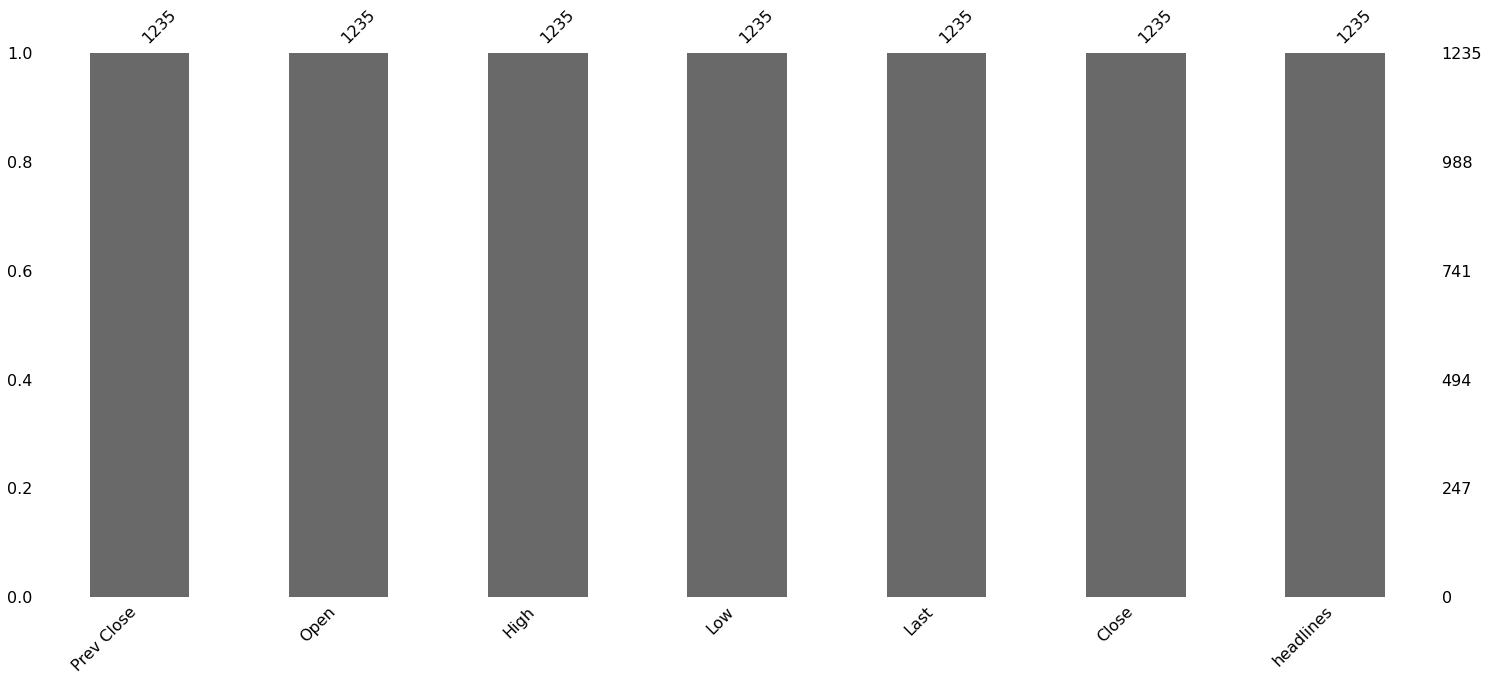

In [ ]:
## verifying missing data
!pip install missingno
import missingno as msno
msno.bar(df)

In [ ]:
## Rename the headings with uppercase
df.rename(columns={'PREV CLOSE': 'PREVCLOSE'}, inplace=True)
df.rename(columns = str.lower , inplace = True)

In [ ]:
df.columns

Index(['prev close', 'open', 'high', 'low', 'last', 'close', 'headlines'], dtype='object')

In [ ]:
## Adding new columns for sentimental analysis
df['compound'] = ''
df['negative'] = ''
df['neutral'] = ''
df['positive'] = ''

In [ ]:
## Saving a copy of data for the checkpoint
checkpoint = df.copy()
checkpoint.describe()

prev close         open         high          low         last  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean   1574.537206  1575.185587  1588.087126  1560.909757  1574.894089   
std     452.579036   452.128973   453.828645   451.002989   452.170522   
min     767.700000   770.450000   810.000000   738.750000   774.800000   
25%    1190.950000  1193.175000  1202.225000  1181.025000  1192.000000   
50%    1428.600000  1431.000000  1439.850000  1415.550000  1429.050000   
75%    1980.125000  1980.825000  1998.950000  1963.450000  1978.100000   
max    2495.000000  2499.000000  2503.300000  2483.000000  2491.150000   

             close  
count  1235.000000  
mean   1574.811822  
std     452.365207  
min     767.700000  
25%    1192.300000  
50%    1430.900000  
75%    1980.125000  
max    2495.000000

In [ ]:
## Verifying with df
print(checkpoint.columns, df.columns)

Index(['prev close', 'open', 'high', 'low', 'last', 'close', 'headlines',
       'compound', 'negative', 'neutral', 'positive'],
      dtype='object') Index(['prev close', 'open', 'high', 'low', 'last', 'close', 'headlines',
       'compound', 'negative', 'neutral', 'positive'],
      dtype='object')


2.c. Filling the values for sentimental data using **vader**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

## Performing sentiment analysing using vader
sid = SentimentIntensityAnalyzer()
print('Preparing sentiment scores:')

df['compound'] = df['headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound sentiment analysis completed.')
df['negative'] = df['headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
print('Negative sentiment analysis completed.')
df['neutral'] = df['headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
print('Neutral sentiment analysis completed.')
df['positive'] = df['headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])
print('Positive sentiment analysis completed.')
print('Results: (10 values)')
df.head(10)

Preparing sentiment scores:
Compound sentiment analysis completed.
Negative sentiment analysis completed.
Neutral sentiment analysis completed.
Positive sentiment analysis completed.
Results: (10 values)


prev close     open     high      low     last    close  \
2016-01-01     1082.15  1082.40  1090.25  1076.15  1088.70  1088.75   
2016-01-04     1088.75  1084.00  1084.00  1068.10  1068.50  1070.50   
2016-01-05     1070.50  1070.20  1074.80  1061.35  1062.00  1062.40   
2016-01-06     1062.40  1056.65  1076.75  1056.65  1067.55  1067.10   
2016-01-07     1067.10  1060.10  1064.90  1049.70  1052.55  1056.20   
2016-01-08     1056.20  1061.95  1064.50  1057.25  1062.00  1062.35   
2016-01-11     1062.35  1052.05  1061.00  1045.30  1058.50  1058.60   
2016-01-12     1058.60  1063.90  1063.90  1043.50  1046.00  1046.95   
2016-01-13     1046.95  1052.00  1062.75  1037.00  1056.30  1060.15   
2016-01-14     1060.15  1050.15  1057.40  1039.50  1052.00  1049.75   

                                                    headlines  compound  \
2016-01-01  ET Recommendation Havells AP22 Air Purifier  g...    0.9988   
2016-01-04  It is time we pulled I out of Brics and India ...    0.9958   
2016-01-05  IT hardware vendors seek sops under Make in In...   -0.9980   
2016-01-06  Saudi Arabia could buy nuclear weapons from Pa...    0.9918   
2016-01-07  Aamir Khan no more face of Incredible India To...    0.9980   
2016-01-08  Indira Gandhi waited to meet US president not ...   -0.9958   
2016-01-11  If China doesnt play fairly US should tax thei...    0.9983   
2016-01-12  Zomato shuts down online ordering operations i...    0.9955   
2016-01-13  IIP shrinks 3.2 in November while CPI edges up...    0.9979   
2016-01-14  Global PC shipment declines 8.3 in Q4 2015 Gar...    0.9996   

            negative  neutral  positive  
2016-01-01     0.087    0.797     0.117  
2016-01-04     0.096    0.792     0.112  
2016-01-05     0.106    0.800     0.094  
2016-01-06     0.090    0.803     0.107  
2016-01-07     0.074    0.828     0.098  
2016-01-08     0.100    0.810     0.090  
2016-01-11     0.080    0.813     0.107  
2016-01-12     0.046    0.887     0.067  
2016-01-13     0.082    0.815     0.103  
2016-01-14     0.060    0.837     0.103

In [ ]:
## Saving the progress to csv file
df.to_csv('data_with_sentiment_analysis.csv', encoding='utf-8')

In [ ]:
## As the textual data has been translated to the snetiment score
## Dropping the column for headlines text
df.drop(['headlines'], inplace=True, axis=1)
print(df.head(10))

            prev close     open     high      low     last    close  compound  \
2016-01-01     1082.15  1082.40  1090.25  1076.15  1088.70  1088.75    0.9988   
2016-01-04     1088.75  1084.00  1084.00  1068.10  1068.50  1070.50    0.9958   
2016-01-05     1070.50  1070.20  1074.80  1061.35  1062.00  1062.40   -0.9980   
2016-01-06     1062.40  1056.65  1076.75  1056.65  1067.55  1067.10    0.9918   
2016-01-07     1067.10  1060.10  1064.90  1049.70  1052.55  1056.20    0.9980   
2016-01-08     1056.20  1061.95  1064.50  1057.25  1062.00  1062.35   -0.9958   
2016-01-11     1062.35  1052.05  1061.00  1045.30  1058.50  1058.60    0.9983   
2016-01-12     1058.60  1063.90  1063.90  1043.50  1046.00  1046.95    0.9955   
2016-01-13     1046.95  1052.00  1062.75  1037.00  1056.30  1060.15    0.9979   
2016-01-14     1060.15  1050.15  1057.40  1039.50  1052.00  1049.75    0.9996   

            negative  neutral  positive  
2016-01-01     0.087    0.797     0.117  
2016-01-04     0.096    

In [ ]:
## Printing information about the prepared data
print(df.describe())
print(df.info())

        prev close         open         high          low         last  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean   1574.537206  1575.185587  1588.087126  1560.909757  1574.894089   
std     452.579036   452.128973   453.828645   451.002989   452.170522   
min     767.700000   770.450000   810.000000   738.750000   774.800000   
25%    1190.950000  1193.175000  1202.225000  1181.025000  1192.000000   
50%    1428.600000  1431.000000  1439.850000  1415.550000  1429.050000   
75%    1980.125000  1980.825000  1998.950000  1963.450000  1978.100000   
max    2495.000000  2499.000000  2503.300000  2483.000000  2491.150000   

             close     compound     negative      neutral     positive  
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000  
mean   1574.811822     0.939087     0.072775     0.812628     0.114584  
std     452.365207     0.314436     0.013014     0.023530     0.018219  
min     767.700000    -0.998800     0.035

2.d. Data Visualisation

In [ ]:
feature = ['open', 'high', 'low', 'close']
list(enumerate(feature))

[(0, 'open'), (1, 'high'), (2, 'low'), (3, 'close')]

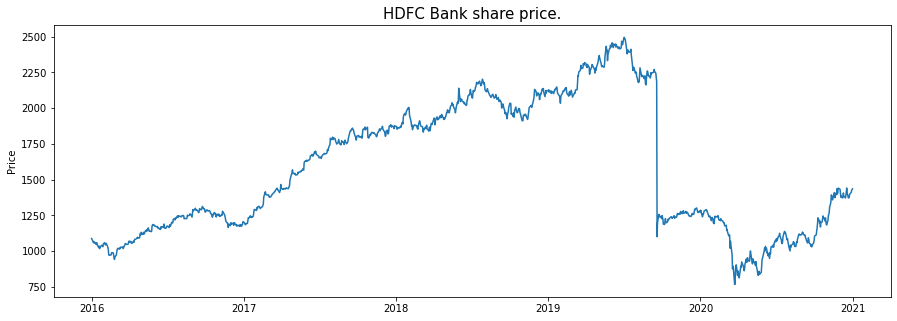

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('HDFC Bank share price.', fontsize=15)
plt.ylabel('Price')
plt.show()

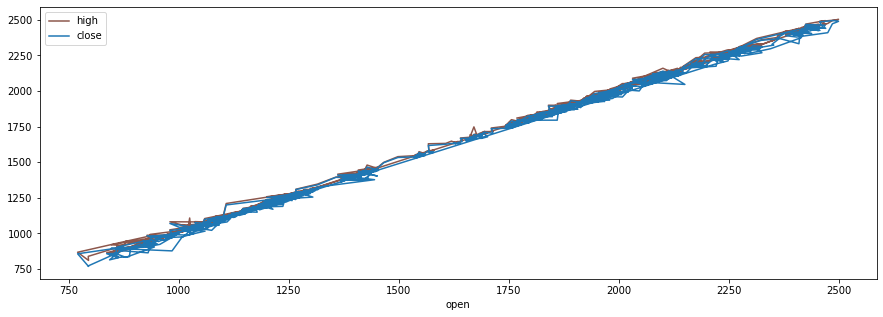

In [ ]:
import seaborn as sns
colors = sns.color_palette()

## Plotting high and close relation
fig,ax = plt.subplots(figsize=(15,5))
df.plot(ax=ax,x='open',y='high',color=colors[5])
df.plot(ax=ax,x='open',y='close',color=colors[0])
plt.show()

<AxesSubplot:>

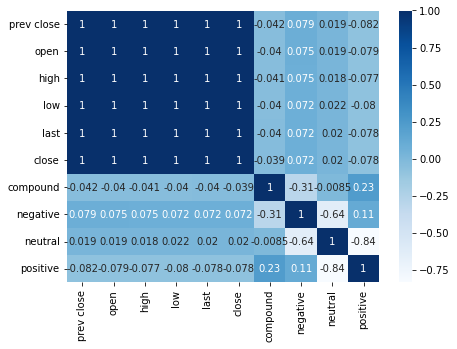

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

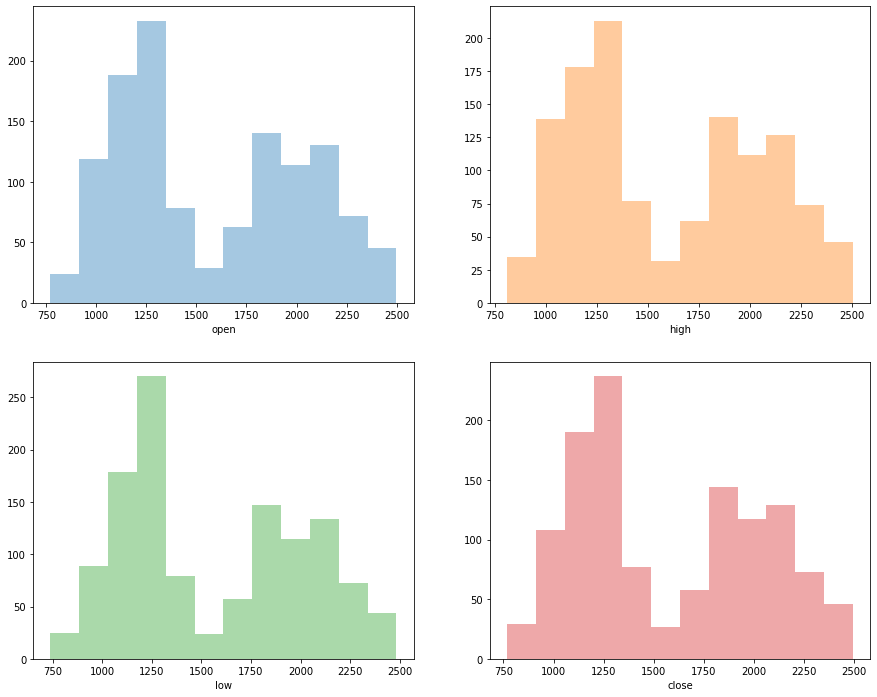

In [ ]:
## Distribution plots
plt.figure(figsize=(15,12))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(df[i[1]] , kde = False , color = base_color)
    plt.xlabel(i[1]);

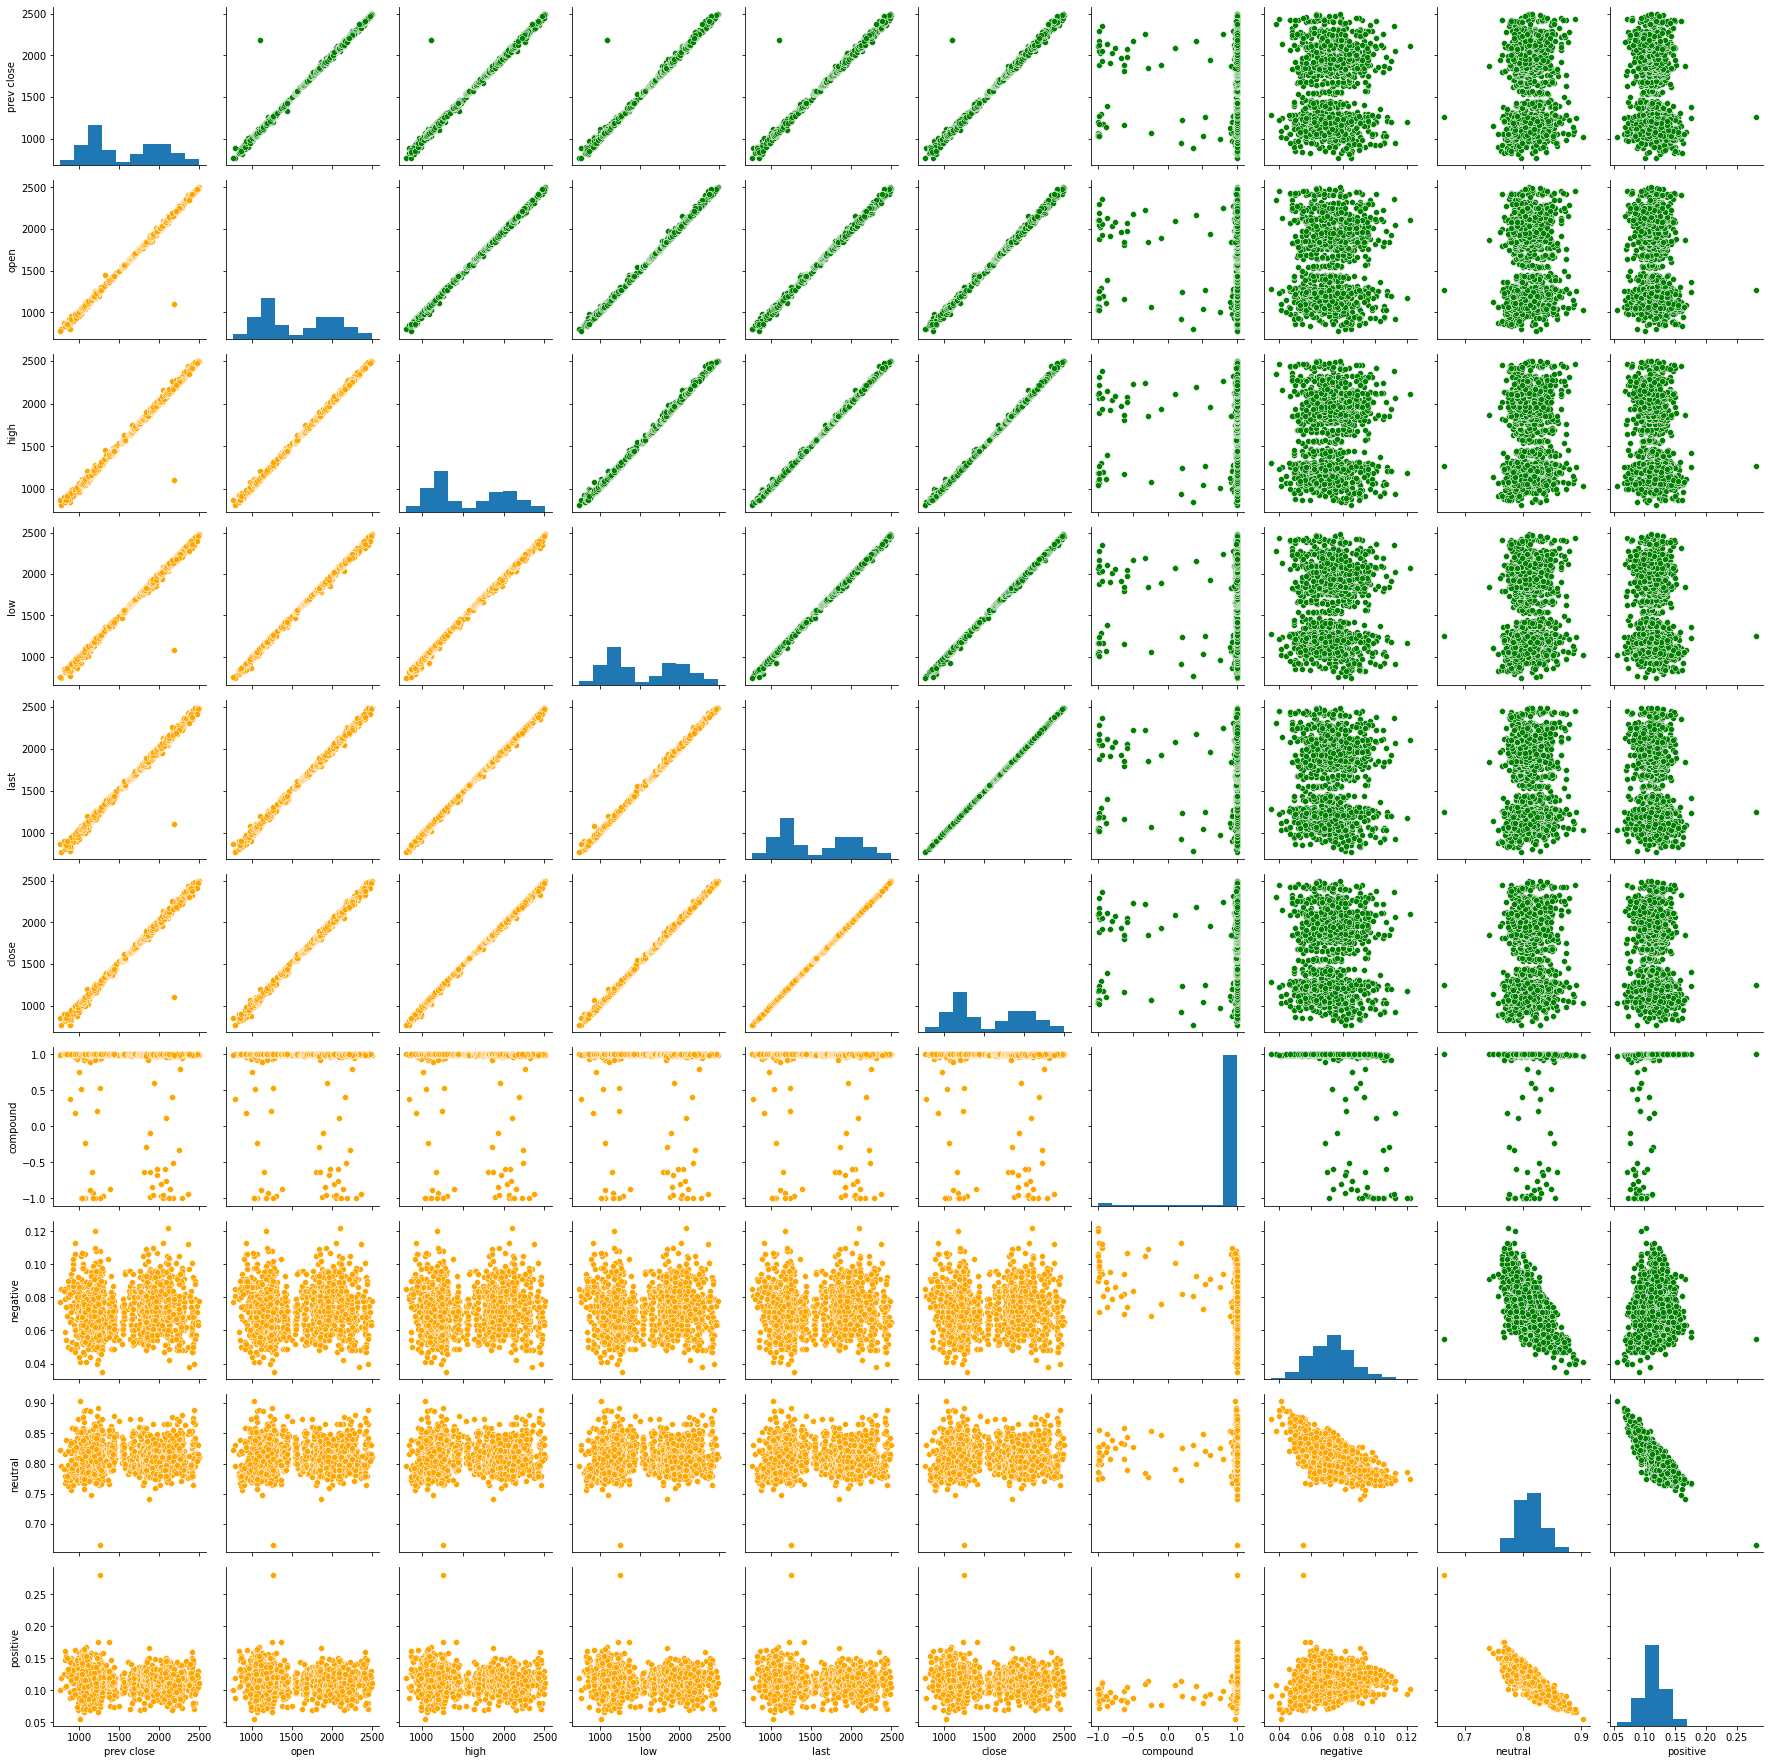

In [ ]:
## Scatterplots
color = sns.PairGrid(df)
color.map_upper(sns.scatterplot,color = 'green')
color.map_lower(sns.scatterplot,color = 'orange')
color.map_diag(plt.hist)

In [ ]:
print("Total size of dataset: ",len(df))
print("Total values of more positive news: ", sum(np.where(df["positive"] > df["negative"], True, False)))
print("Total values of more negative news: ", sum(np.where(df["positive"] < df["negative"], True, False)))

Total size of dataset:  1235
Total values of more positive news:  1218
Total values of more negative news:  15


In [ ]:
## 5 day rolling mean data, as market is closed for 2 days
df.rolling(5).mean().head(10)

prev close     open     high      low     last    close  compound  \
2016-01-01         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2016-01-04         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2016-01-05         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2016-01-06         NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2016-01-07     1074.18  1070.67  1078.14  1062.39  1067.86  1068.99   0.59728   
2016-01-08     1068.99  1066.58  1072.99  1058.61  1062.52  1063.71   0.19836   
2016-01-11     1063.71  1060.19  1068.39  1054.05  1060.52  1061.33   0.19886   
2016-01-12     1061.33  1058.93  1066.21  1050.48  1057.32  1058.24   0.59756   
2016-01-13     1058.24  1058.00  1063.41  1046.55  1055.07  1056.85   0.59878   
2016-01-14     1056.85  1056.01  1061.91  1044.51  1054.96  1055.56   0.59910   

            negative  neutral  positive  
2016-01-01       NaN      NaN       NaN  
2016-01-04       NaN      NaN       NaN  
2016-01-05       NaN      NaN       NaN  
2016-01-06       NaN      NaN       NaN  
2016-01-07    0.0906   0.8040    0.1056  
2016-01-08    0.0932   0.8066    0.1002  
2016-01-11    0.0900   0.8108    0.0992  
2016-01-12    0.0780   0.8282    0.0938  
2016-01-13    0.0764   0.8306    0.0930  
2016-01-14    0.0736   0.8324    0.0940

<AxesSubplot:>

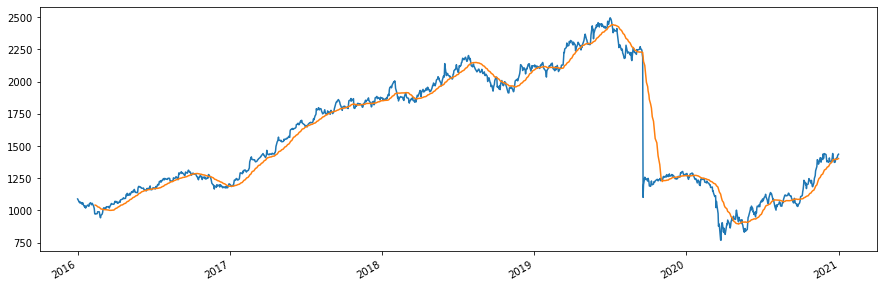

In [ ]:
# setting figure size
plt.figure(figsize=(15,5))

# plotting the close price and a 30-day rolling mean of close price
df['close'].plot()
df.rolling(window=30).mean()['close'].plot()

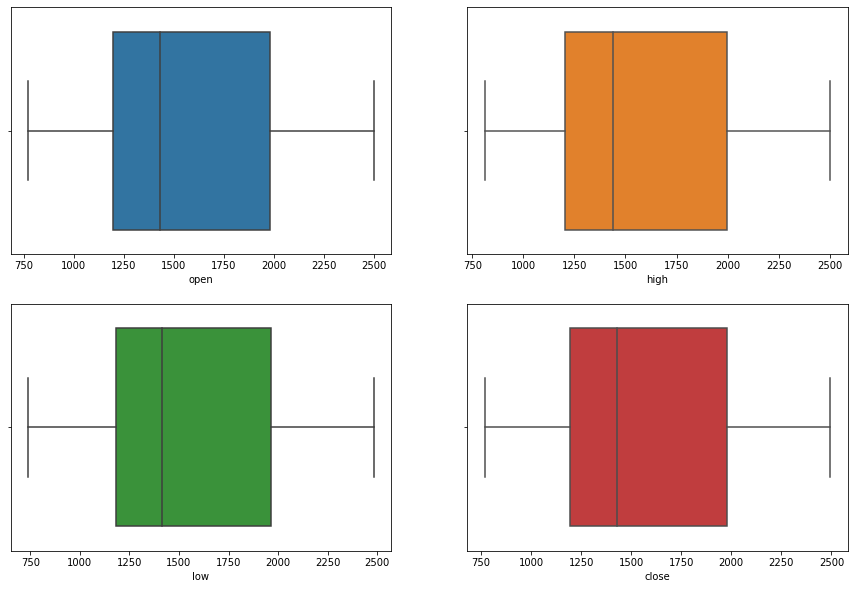

In [ ]:
## Box plot for finding outliers

plt.figure(figsize=(15,10))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = df[i[1]] , color = base_color)
    plt.xlabel(i[1]);

**3. Model Building**

3.a. Direct approach using Linear regression

In [ ]:
df_a = df.copy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_a = df_a.drop('close', axis=1)
y_a = df_a['close']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_a, y_train_a)

LinearRegression()

In [ ]:
predictions_a = model.predict(X_test_a)
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy_a = r2_score(y_test_a, predictions_a)
print("Accuracy:", accuracy_a)

Accuracy: 0.9999703574406373


3.b. Using auto h2o ML method

In [ ]:
h2o.init()
df_b = h2o.import_file('/content/drive/MyDrive/final/results/data_with_sentiment_analysis.csv')
train_b, test_b = df_b.split_frame(ratios=[0.8], seed=1)
y_b = 'close'
X_b = df_b.columns
X_b.remove(y_b)
aml = H2OAutoML(max_runtime_secs=60)
aml.train(x=X_b, y=y_b, training_frame=train_b)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         5 mins 47 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    24 days
H2O_cluster_name:           H2O_from_python_unknownUser_r0qfob
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.109 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
16:49:25.49: _train param, Dropping bad and constant columns: [headlines]

█████████
16:49:35.133: _train param, Dropping bad and constant columns: [headlines]
16:49:35.947: _train param, Dropping bad and constant columns: [headlines]

████████████
16:49:46.406: _train param, Dropping unused columns: [headlines]
16:49:46.771: _train param, Dropping bad and constant columns: [headlines]

████
16:49:50.227: _train param, Dropping bad and constant columns: [headlines]

██████
16:49:55.292: _train param, Dropping bad and constant columns: [headlines]

████
16:49:59.309: _train param, Dropping bad and constant columns: [headlines]

██████
16:50:04.990: _train param, Dropping bad and constant columns: [headlines]

█████
16:50:09.885: _train param, Dropping unused columns: [headlines]

█
16:50:10.74: _train param, Dropping unused columns: [headlines]
16:50:10.381: _train param, Dr

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_2_20230305_164925


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/12
# GBM base models (used / total)           3/5
# XGBoost base models (used / total)       1/3
# DRF base models (used / total)           1/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 64.56611936203254
RMSE: 8.035304559382459
MAE: 7.10891537030812
RMSLE: 0.005735441034546702
Mean Residual Deviance: 64.56611936203254
R^2: 0.9996860909855599
Null degrees of freedom: 986
Residual degrees of freedom: 981
Null deviance: 203010289.22025305
Residual deviance: 63726.75981032611
AIC: 6928.494502206447

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 52.61985338060575
RMSE: 7.253954327165684
MAE: 4.4102307686098925
RMSLE: 0.005876066245025321
Mean Residual Deviance: 52.61985338060575
R^2: 0.9997441716107782
Null degrees of freedom: 986
Residual degrees of freedom: 981
Null deviance: 203702579.08870408
Residual deviance: 51935.79528665787
AIC: 6726.557938412846

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     4.40648      0.312263     4.8317        4.07526       4.62742       4.22554       4.27247
mean_residual_deviance  52.9815      28.9166      103.449       32.8659       49.9006       41.7659       36.9259
mse                     52.9815      28.9166      103.449       32.8659       49.9006       41.7659       36.9259
null_deviance           4.07405e+07  5.63285e+06  4.08878e+07   3.21943e+07   3.93718e+07   4.41617e+07   4.7087e+07
r2                      0.999743     0.000128011  0.999525      0.999829      0.999734      0.999801      0.999827
residual_deviance       10387.2      5315.73      19345         5488.6        10429.2       8770.84       7902.14
rmse                    7.10145      1.78569      10.171        5.73288       7.06403       6.46266       6.07667
rmsle                   0.00564891   0.00183658   0.00850431    0.00383783    0.00591663    0.00574337    0.00424243

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
predictions_b = aml.leader.predict(test_b)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
print(test_b['close'])

  close
1062.4
1049.75
1059.75
 949.6
 961
1030.45
1053.85
1057.45
1061.5
1091.15
[248 rows x 1 column]



In [ ]:
print(predictions_b)

  predict
 1072.92
 1060.84
 1070.02
  963.965
  975.697
 1036.84
 1060.75
 1066.63
 1070.73
 1099.17
[248 rows x 1 column]



3.c. Using Regressor models

In [ ]:
df_c = df.copy()
scaler = MinMaxScaler()

df_c = pd.DataFrame(scaler.fit_transform(df_c))
df_c.columns = df.columns
df_c.index = df.index
df_c.head()

prev close      open      high       low      last     close  \
2016-01-01    0.182047  0.180469  0.165505  0.193436  0.182888  0.185868   
2016-01-04    0.185868  0.181395  0.161814  0.188820  0.171119  0.175302   
2016-01-05    0.175302  0.173411  0.156381  0.184951  0.167332  0.170613   
2016-01-06    0.170613  0.165572  0.157533  0.182256  0.170565  0.173334   
2016-01-07    0.173334  0.167568  0.150534  0.178271  0.161826  0.167024   

            compound  negative   neutral  positive  
2016-01-01  0.999400  0.597701  0.554622  0.271111  
2016-01-04  0.997899  0.701149  0.533613  0.248889  
2016-01-05  0.000400  0.816092  0.567227  0.168889  
2016-01-06  0.995898  0.632184  0.579832  0.226667  
2016-01-07  0.998999  0.448276  0.684874  0.186667

In [ ]:
X_c=df_c.drop('close',axis=1)
y_c=df['close']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state = 0)
X_train_c.shape
X_train_c[:10]

prev close      open      high       low      last  compound  \
2019-03-14    0.844584  0.852969  0.848934  0.843830  0.843796  0.998549   
2018-03-27    0.651740  0.649880  0.643123  0.651999  0.652111  0.999099   
2017-10-19    0.637295  0.631367  0.623044  0.631733  0.623532  0.999700   
2020-03-18    0.120072  0.124121  0.108073  0.072381  0.072072  0.967681   
2017-03-20    0.381028  0.379625  0.371966  0.393980  0.385236  0.999800   
2016-01-04    0.185868  0.181395  0.161814  0.188820  0.171119  0.997899   
2017-11-17    0.602096  0.612218  0.607276  0.615967  0.610132  0.999800   
2017-05-23    0.467956  0.468341  0.456830  0.473699  0.462726  0.997298   
2020-04-08    0.074336  0.063348  0.079726  0.073011  0.066362  0.999750   
2018-08-24    0.759683  0.752394  0.758046  0.760957  0.754625  0.999450   

            negative   neutral  positive  
2019-03-14  0.379310  0.718487  0.177778  
2018-03-27  0.586207  0.575630  0.248889  
2017-10-19  0.643678  0.323529  0.488889  
2020-03-18  0.448276  0.785714  0.080000  
2017-03-20  0.344828  0.642857  0.271111  
2016-01-04  0.701149  0.533613  0.248889  
2017-11-17  0.390805  0.600840  0.297778  
2017-05-23  0.689655  0.537815  0.244444  
2020-04-08  0.367816  0.642857  0.262222  
2018-08-24  0.540230  0.546218  0.293333

In [ ]:
import xgboost
import lightgbm

gbm = lightgbm.LGBMRegressor()
gbm.fit(X_train_c, y_train_c)
prediction_c=gbm.predict(X_test_c)
print(mean_squared_error(prediction_c, y_test_c))

42.215051073569164


In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train_c, y_train_c)
prediction_c = xgb.predict(X_test_c)
print(mean_squared_error(prediction_c, y_test_c))

51.6639762495133


In [ ]:
df_d = df["close"].copy()
df_d = pd.DataFrame(df_d)
df_d.head()

close
2016-01-01  1088.75
2016-01-04  1070.50
2016-01-05  1062.40
2016-01-06  1067.10
2016-01-07  1056.20

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
dfs_d = scaler.fit_transform(df_d)

In [ ]:
dfs_d.shape

(1235, 1)

In [ ]:
train_size_d = int(len(dfs_d)*0.9)
test_size_d = len(dfs_d) - train_size_d
X_train_d, y_test_d=dfs_d[0:train_size_d,:],dfs_d[train_size_d:len(dfs_d),:1]

In [ ]:
train_data,cv_data = X_train_d[0:int(len(X_train_d)*0.8)],X_train_d[int(len(X_train_d)*0.8):]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 60
Xtrain, ytrain = create_dataset(train_data, time_step)
Xtest, ytest = create_dataset(y_test_d, time_step)
Xcv,ycv = create_dataset(cv_data, time_step)

In [ ]:
print(Xtrain.shape), print(ytrain.shape)

(827, 60)
(827,)


(None, None)

In [ ]:
print(Xtest.shape), print(ytest.shape)

(63, 60)
(63,)


(None, None)

In [ ]:
Xtrain =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1] , 1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1] , 1)
Xcv = Xcv.reshape(Xcv.shape[0],Xcv.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import tensorflow as tf


In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
model = Sequential()
model.add(LSTM(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26), input_shape = (Xtrain.shape[1], 1), unroll = True))
model.add(Dense(1, name="output_layer"))
model.compile(optimizer = Adam(learning_rate=0.001), loss = root_mean_squared_error)

In [ ]:
model.fit(Xtrain,ytrain,validation_data=(Xcv,ycv),epochs=100,batch_size=16,verbose=1)

Epoch 1/100
52/52 [==============================] - 24s 175ms/step - loss: 0.0675 - val_loss: 0.0248
Epoch 2/100
52/52 [==============================] - 3s 58ms/step - loss: 0.0228 - val_loss: 0.0284
Epoch 3/100
52/52 [==============================] - 3s 61ms/step - loss: 0.0199 - val_loss: 0.0277
Epoch 4/100
52/52 [==============================] - 2s 39ms/step - loss: 0.0223 - val_loss: 0.0221
Epoch 5/100
52/52 [==============================] - 4s 72ms/step - loss: 0.0210 - val_loss: 0.0218
Epoch 6/100
52/52 [==============================] - 4s 84ms/step - loss: 0.0187 - val_loss: 0.0234
Epoch 7/100
52/52 [==============================] - 3s 51ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 8/100
52/52 [==============================] - 2s 39ms/step - loss: 0.0194 - val_loss: 0.0225
Epoch 9/100
52/52 [==============================] - 2s 38ms/step - loss: 0.0168 - val_loss: 0.0205
Epoch 10/100
52/52 [==============================] - 2s 38ms/step - loss: 0.0171 - val_loss: 0.02

In [ ]:
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

2/2 [==============================] - 0s 27ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
rescaled_ytrain = scaler.inverse_transform(ytrain.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(rescaled_ytrain,train_predict))

18.13272738851396

In [ ]:
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
rmse = math.sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

MSE: 565.2411820504213
RMSE: 23.77480140927409
MAPE: 0.015401272104545958


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dfs_d[700:,]),color='red', label='Actual Price')
plt.plot(test_predict, color='blue', linestyle='dashed',label='Predicted Price')
plt.title('Price Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
test_predict

array([[1067.7244],
       [1082.2261],
       [1107.841 ],
       [1118.8755],
       [1144.7527],
       [1164.3156],
       [1192.1586],
       [1232.1328],
       [1221.4058],
       [1205.6058],
       [1213.4731],
       [1179.313 ],
       [1199.9817],
       [1208.2595],
       [1228.1476],
       [1251.2361],
       [1242.8978],
       [1242.8263],
       [1220.4861],
       [1235.9828],
       [1218.6244],
       [1197.2305],
       [1190.7701],
       [1217.1472],
       [1250.5396],
       [1264.3809],
       [1275.7963],
       [1309.8154],
       [1342.8911],
       [1394.3833],
       [1396.1921],
       [1378.5708],
       [1363.7772],
       [1372.1759],
       [1409.7136],
       [1415.4773],
       [1385.1337],
       [1408.3975],
       [1402.0105],
       [1442.335 ],
       [1413.3677],
       [1432.9244],
       [1446.9065],
       [1441.4232],
       [1416.3737],
       [1386.397 ],
       [1391.3463],
       [1380.4053],
       [1384.1255],
       [1413.0247],


In [ ]:
df_e = df.copy()
X_e = df_e.loc[:,df_e.columns!='CLOSE']
print(X.head())
y_e = df_e['close']
print(y.head())

            prev close     open     high      low     last    close  compound  \
2016-01-01     1082.15  1082.40  1090.25  1076.15  1088.70  1088.75    0.9988   
2016-01-04     1088.75  1084.00  1084.00  1068.10  1068.50  1070.50    0.9958   
2016-01-05     1070.50  1070.20  1074.80  1061.35  1062.00  1062.40   -0.9980   
2016-01-06     1062.40  1056.65  1076.75  1056.65  1067.55  1067.10    0.9918   
2016-01-07     1067.10  1060.10  1064.90  1049.70  1052.55  1056.20    0.9980   

            negative  neutral  positive  
2016-01-01     0.087    0.797     0.117  
2016-01-04     0.096    0.792     0.112  
2016-01-05     0.106    0.800     0.094  
2016-01-06     0.090    0.803     0.107  
2016-01-07     0.074    0.828     0.098  
2016-01-01    1088.75
2016-01-04    1070.50
2016-01-05    1062.40
2016-01-06    1067.10
2016-01-07    1056.20
Name: close, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train_e,X_test_e,y_train_e,y_test_e=train_test_split(X_e,y_e,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train_e)
sc1 = StandardScaler()
sc1.fit_transform(X_test_e)
from sklearn.svm import SVR
svr = SVR(kernel='linear', C = 50, verbose = True)

In [ ]:
svr.fit(X_train_e,y_train_e)

[LibSVM]

SVR(C=50, kernel='linear', verbose=True)

In [ ]:
y_train_pred_e = svr.predict(X_train_e)
y_test_pred_e = svr.predict(X_test_e)

In [ ]:
result = pd.DataFrame({'Actual' : y_test_e , 'Predicted' : y_test_pred_e}).reset_index()[['Actual' , 'Predicted']]
result

Actual    Predicted
0     951.65   966.200035
1    1031.70   992.961443
2    1028.75   993.052378
3    2280.95  2339.205055
4    1272.85  1275.052476
..       ...          ...
242  1809.65  1826.831798
243  1803.30  1802.419191
244  1229.00  1204.465779
245  2280.90  2414.655029
246  1138.55  1127.270240

[247 rows x 2 columns]

In [ ]:
mse = mean_squared_error(y_test_e,y_test_pred_e)
print("Mean_squared_error is: ", mse)
r2score = r2_score(y_test_e , y_test_pred_e)
print("R2 score is: " , r2score)

Mean_squared_error is:  7971.497158328377
R2 score is:  0.9610811950203848


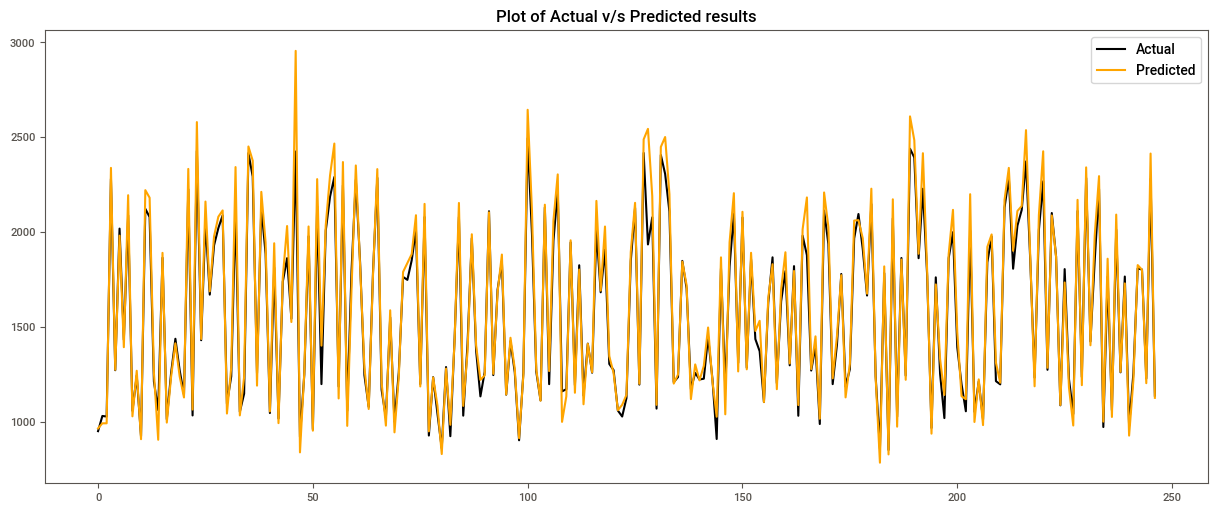

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(result['Actual'],label = 'Actual' , color = 'black')
plt.plot(result['Predicted'],label = 'Predicted' , color = 'orange')
plt.title('Plot of Actual v/s Predicted results')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR
model_poly = SVR(kernel = 'poly' , C = 50 , coef0 = 1)

In [ ]:
model_poly.fit(X_train_e,y_train_e)

SVR(C=50, coef0=1, kernel='poly')

In [ ]:
y_train_pred_f = model_poly.predict(X_train_e)
y_test_pred_f = model_poly.predict(X_test_e)

In [ ]:
result = pd.DataFrame({'Actual' : y_test_e , 'Predicted' : y_test_pred_f}).reset_index()[['Actual' , 'Predicted']]
result

Actual    Predicted
0     951.65   953.714597
1    1031.70  1038.306826
2    1028.75  1034.897110
3    2280.95  2278.506271
4    1272.85  1272.304082
..       ...          ...
242  1809.65  1810.445333
243  1803.30  1802.974645
244  1229.00  1226.899388
245  2280.90  2281.897291
246  1138.55  1141.522696

[247 rows x 2 columns]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_e,y_test_pred_f)
print("Mean_squared_error is: ", mse)
r2score = r2_score(y_test_e , y_test_pred_f)
print("R2 score is: " , r2score)

Mean_squared_error is:  15.522993756385382
R2 score is:  0.9999242129358256


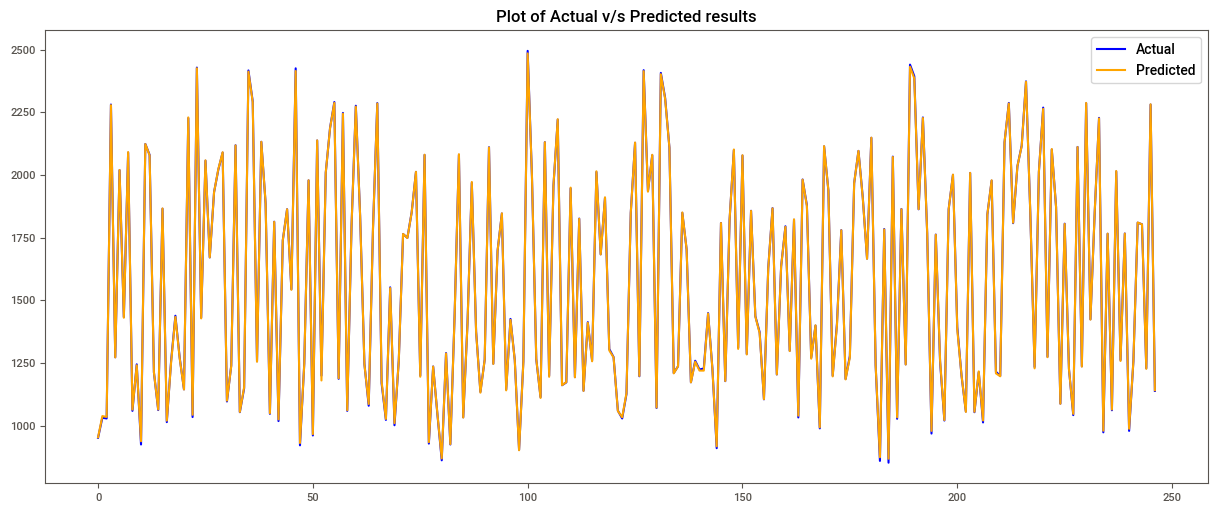

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(result['Actual'],label = 'Actual' , color = 'blue')
plt.plot(result['Predicted'],label = 'Predicted' , color = 'orange')
plt.title('Plot of Actual v/s Predicted results')
plt.legend()
plt.show()

In [ ]:
print(X_test_e.head(1))

            prev close   open   high     low   last   close  compound  \
2020-05-29      945.25  944.0  955.0  923.45  947.1  951.65    0.9999   

            negative  neutral  positive  
2020-05-29     0.061    0.776     0.163  


EDA using pandas profiling

In [ ]:
df_with_index = df.copy()

In [ ]:
profile = pandas_profiling.ProfileReport(df_with_index)

In [ ]:
from IPython.display import HTML, display, IFrame
html = HTML(profile.to_html())
## Display the HTML report
display(html)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Auto Visualization**

In [ ]:
report = sv.analyze(df_with_index)
report.show_html('report.html')
display('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


'report.html'

In [ ]:
a = html.data
with open('eda_rpeort.html', 'w') as f:
    f.write(a)

In [ ]:
## Saving models
filename = 'gbm_model.pkl'
pickle.dump(gbm, open(filename, 'wb'))

In [ ]:
filename = 'svr_linear.pkl'
pickle.dump(svr, open(filename, 'wb'))

filename = 'svr_poly.pkl'
pickle.dump(model_poly, open(filename, 'wb'))

In [ ]:
filename = 'lstm_poly.pkl'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-05 19:36:54         2337
metadata.json                                  2023-03-05 19:36:54           64
variables.h5                                   2023-03-05 19:36:54       820232


In [ ]:
filename = 'xgb_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
!pwd

/content
